In [57]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# importing the dataset
df=pd.read_csv('Advertising.csv')

In [5]:
# dropping Radio and Newspaper columns to make a simple 1 feature dataset
df.drop(columns={'Radio','Newspaper'},inplace=True)

In [6]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


<!-- Exploratory Data Analysis -->


Exploratory Data Analysis
==

In [7]:
#Checking for null values
df.isna().sum()

TV       0
Sales    0
dtype: int64

In [13]:
#Checking for duplucates
df.duplicated().sum()

np.int64(0)

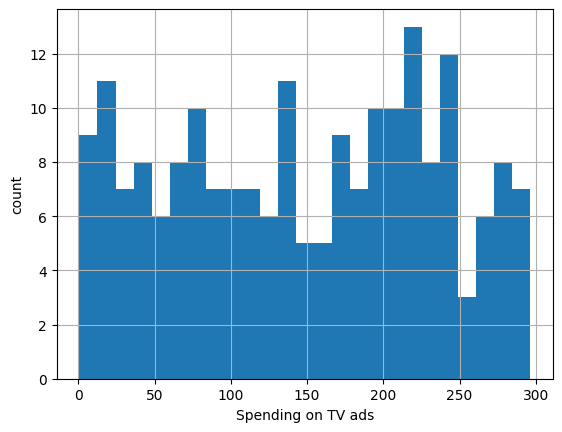

In [20]:
df['TV'].hist(bins=25)
plt.xlabel('Spending on TV ads')
plt.ylabel('count')
plt.show()

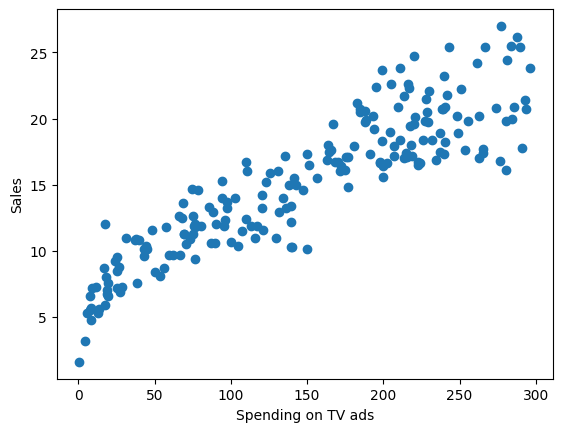

In [24]:
plt.scatter(x=df['TV'],y=df['Sales'])
plt.xlabel('Spending on TV ads')
plt.ylabel('Sales')
plt.show()

Model Building
==

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Train-test splilting
x=df[['TV']]   # If [[]] is not used, series type gets generated instead of DF of 1 column
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
# Checking the data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [38]:
# Fitting the model
Linear=LinearRegression()

Linear.fit(x_train,y_train)

LinearRegression()

In [40]:
# Predicting using the model
y_pred=Linear.predict(x_test)

In [41]:
y_pred

array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
       11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
        8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
       16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
       19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
       10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
       18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
       20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
       13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
        9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
       11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
       14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759])

Validation
==

In [42]:
# MSE - Ideal value of MSE should be as colse to 0 as possible
mean_squared_error(y_test,y_pred)

np.float64(5.179525402166653)

In [43]:
# R2 score should be close to 1 as much as possible
r2_score(y_test,y_pred)

0.814855389208679

In [47]:
#Passing the entire dataset to generate a line
y_result=Linear.predict(x)

Visualising and checking the assumptions of Simple linear regression
==

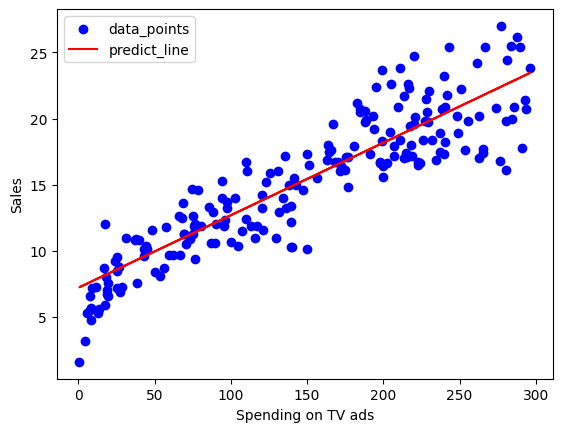

In [54]:
# 1.Linearity

plt.scatter(x,y,color='blue',label='data_points')
plt.plot(x,y_result,color='red',label='predict_line')
plt.xlabel('Spending on TV ads')
plt.ylabel('Sales')
plt.legend()
plt.show()

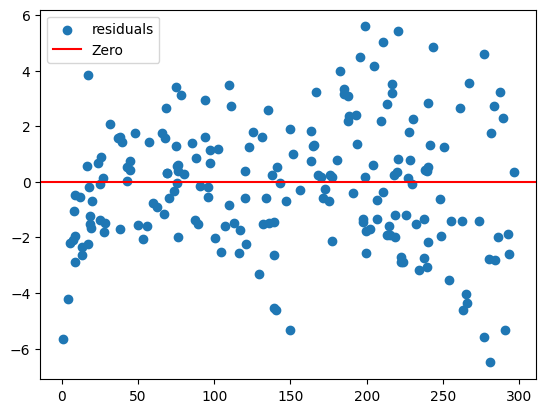

In [55]:
# 2.Homoscedasticity'

residuals=y-y_result

plt.scatter(x,residuals,label='residuals')
plt.axhline(y=0,color='red',label='Zero')
plt.legend()
plt.show()


In [58]:
# 4. Normality

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(df['TV'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

Shapiro-Wilk Test: W=0.949509373275166, p-value=1.6926914202956343e-06


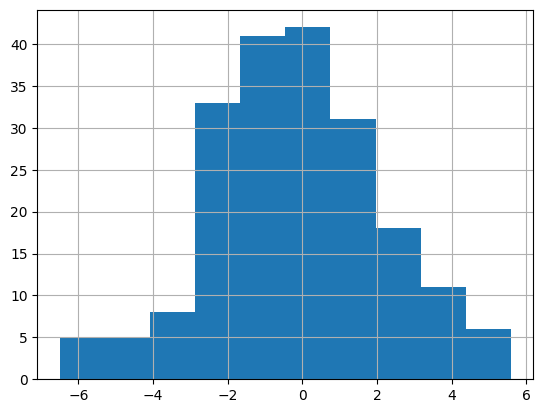

In [61]:
residuals.hist()
plt.show()

TRIAL 2 with Normalisation


In [62]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [66]:
x_normalised=sc.fit_transform(x)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_normalised,y,test_size=0.3,random_state=40)

In [69]:
# Checking the data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [70]:
linear_2=LinearRegression()

linear_2.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred_2=linear_2.predict(x_test)

In [72]:
mean_squared_error(y_test,y_pred_2)

np.float64(5.490386680142034)

In [73]:
r2_score(y_test,y_pred_2)

0.805160036207957